In [66]:
import warnings
warnings.simplefilter('ignore')

# LDA

In [29]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])


In [30]:
np.unique(y)

array([0., 1., 2.])

In [31]:
X.shape

(300, 2)

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True).fit(X,y)

In [34]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

In [35]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

## 연습문제

In [77]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model =LinearDiscriminantAnalysis().fit(X,y)
y_pred = model.predict(X)

In [80]:
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [81]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [86]:
df = model.predict_proba(X)
df1, df2, df3 = (df[:, 0], df[:,1], df[:,2])

In [88]:
from sklearn.preprocessing import label_binarize
y_vec = label_binarize(y, [0,1,2])

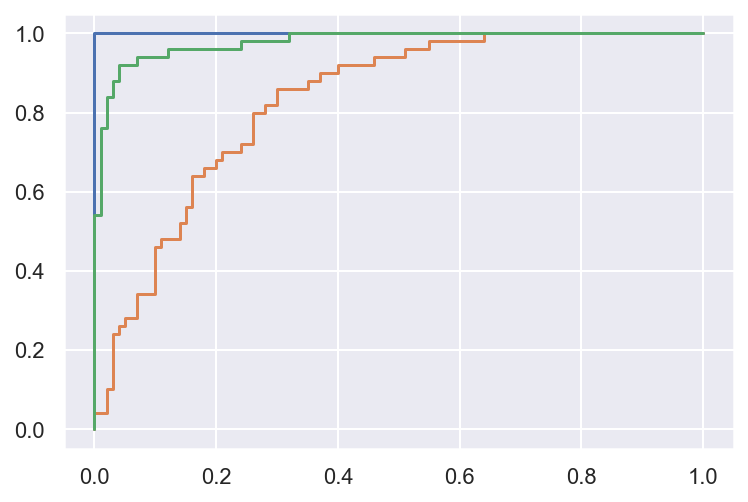

In [89]:
for i in range(3):
    model = LinearDiscriminantAnalysis().fit(X, y_vec[:,i])
    fpr, tpr, _ = roc_curve(y_vec[:,i], model.predict_proba(X)[:,1])
    plt.plot(fpr, tpr)
plt.show()